<a href="https://colab.research.google.com/github/Paul-mwaura/Gender-Based-Discrimination-NLP/blob/main/GBV_Topic_Modelling_Solution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Based Violence Topic Modelling

## Import the Libraries

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('stopwords')
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the Dataset

In [ ]:
df = pd.read_csv("/content/GBV_data_clean_v01.csv", error_bad_lines=False)
df.head()

,Unnamed: 0,username,new_tweets,clean_tweets,tweets_without_stopwords,replies,retweets,likes
0,0,shaybspears,We should talk more about how this dangerous w...,we should talk more about how this dangerous w...,talk dangerous woman stalking britney sending ...,1,14,27
1,1,kaylanicole9991,"And no, getting me drunk wonât work. After w...",and no getting me drunk won t work after what...,getting drunk work happened male best friend j...,1,0,0
2,2,marge78355824,Itâs not just about seeing a random penis...,it s not just about seeing a random penis ...,seeing random penis fear every woman sexual vi...,1,0,1
3,3,explorevenango,A Franklin woman who left multiple messages in...,a franklin woman who left multiple messages in...,franklin woman left multiple messages attempt ...,0,0,0
4,4,politikscommon,I did read the details. Walker was also sue...,i did read the details walker was also sued...,read details walker also sued woman accused wa...,1,0,0


In [ ]:
df.isna().sum()

Unnamed: 0                    0
username                      0
new_tweets                    2
clean_tweets                 23
tweets_without_stopwords    482
replies                       1
retweets                      1
likes                         1
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)
df.isna().sum()

Unnamed: 0                  0
username                    0
new_tweets                  0
clean_tweets                0
tweets_without_stopwords    0
replies                     0
retweets                    0
likes                       0
dtype: int64

In [ ]:
data = pd.DataFrame(df['tweets_without_stopwords'])
data.head()

,tweets_without_stopwords
0,talk dangerous woman stalking britney sending ...
1,getting drunk work happened male best friend j...
2,seeing random penis fear every woman sexual vi...
3,franklin woman left multiple messages attempt ...
4,read details walker also sued woman accused wa...


In [ ]:
data.isna().sum()

tweets_without_stopwords    0
dtype: int64

In [ ]:
data['tweets_without_stopwords'][0]

'talk dangerous woman stalking britney sending creepy emails gay demon britney reported lawyer instead issuing restraining order jamie spears made brit'

Some important points:-

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(data['tweets_without_stopwords'])

We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [ ]:
print(vect_text.shape)
print(vect_text)

(45315, 1000)
  (0, 530)	0.31263214275557655
  (0, 623)	0.37475937020863165
  (0, 446)	0.359150252435049
  (0, 725)	0.38000375075019677
  (0, 347)	0.35169617857927526
  (0, 814)	0.26145554004437976
  (0, 965)	0.1367919611497165
  (0, 215)	0.41176458649755515
  (0, 849)	0.32880615348964776
  (1, 40)	0.1915126034739174
  (1, 895)	0.31258715750486665
  (1, 557)	0.37452154808851373
  (1, 824)	0.2188829111762232
  (1, 176)	0.29974714768481275
  (1, 335)	0.2700742476490259
  (1, 99)	0.27294034959664104
  (1, 537)	0.2540762564228144
  (1, 388)	0.26764041099618274
  (1, 973)	0.22119824660761583
  (1, 353)	0.49421933135900437
  (1, 965)	0.10384431227807862
  (2, 356)	0.1304394733658438
  (2, 513)	0.22990232240664785
  (2, 67)	0.1168545987657141
  (2, 421)	0.17390421097347344
  :	:
  (45310, 239)	0.30360315615926814
  (45310, 994)	0.3220406394901512
  (45310, 642)	0.431431738920888
  (45310, 534)	0.2694761527967481
  (45310, 956)	0.28418204266063757
  (45310, 749)	0.2694761527967481
  (45310, 86

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(f"Word with highest score: {l[0]}\nWord with lowest score: {l[-1]}\n")
print(f"woman score: {dd['woman']}")
print(f"highest score: {dd['highest']}\n")
print(f"violence score: {dd['violence']}")
print(f"stalking socre: {dd['stalking']}")  # police is most common and forecast is least common among the news headlines.

Word with highest score: woman
Word with lowest score: highest

woman score: 2.279487279920324
highest score: 7.116245264005288

violence score: 3.35877301842574
stalking socre: 4.356868435737737


We can therefore see that on the basis of the idf value , 'woman' is the most frequent word while 'highest' is least frequently occuring among the tweets.

## TOPIC MODELLING
### Latent Semantic Analysis (LSA)
The first approach that I have used is the LSA. LSA is basically singular value decomposition.

SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.

Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. We can then use these vectors to find similar words and similar documents using the cosine similarity method.

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract. The model is then fit and transformed on the result given by vectorizer.

Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.0860048  -0.08309691 -0.04952879 ... -0.03600636 -0.07666604
   0.04037697]
 [ 0.11800441 -0.06791489 -0.02234872 ...  0.0712249   0.02666162
   0.06285734]
 [ 0.21519693 -0.18352517 -0.0051291  ... -0.03579993  0.09768945
  -0.12753345]
 ...
 [ 0.0575008  -0.02167509 -0.00375395 ... -0.00685778 -0.01573627
  -0.00693035]
 [ 0.10682528 -0.07440198 -0.03442726 ...  0.06667636  0.07815109
  -0.07441097]
 [ 0.07141648 -0.00066281  0.02211497 ... -0.08794438 -0.02201059
   0.01942698]]
(45315, 10)


In [ ]:
l=lsa_top[0]
print("Tweets Document:")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Tweets Document:
Topic  0  :  8.600479997482813
Topic  1  :  -8.309690571541621
Topic  2  :  -4.952878771051929
Topic  3  :  -0.18916705824174873
Topic  4  :  -0.5505114270666731
Topic  5  :  -3.171410935886523
Topic  6  :  13.719475026029409
Topic  7  :  -3.600635544513368
Topic  8  :  -7.666603932814786
Topic  9  :  4.037697134446786


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00791553  0.00710613  0.00753522 ...  0.09122192  0.02016504
   0.00674847]
 [-0.00023255  0.00193718 -0.00283918 ... -0.01363534 -0.00303281
   0.0010284 ]
 [-0.00173878 -0.00072143 -0.00310151 ...  0.09612276 -0.00466655
   0.00339062]
 ...
 [ 0.00520416  0.01153464  0.00324104 ... -0.10234193  0.01099576
  -0.00370401]
 [ 0.00151929  0.00269194  0.0008189  ... -0.09305678 -0.00350997
   0.01128679]
 [-0.00114178  0.00645731 -0.00140898 ... -0.15005732 -0.01388518
  -0.00255131]]


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
child marriage woman trafficking assault girls sex sexual women man 

Topic 1: 
marriage child marriages end forced girls married children age legal 

Topic 2: 
trafficking girls sex human girl underage young women forced gaetz 

Topic 3: 
gender violence like people envy identity want dont im trans 

Topic 4: 
violence chose gun domestic people today woke choose women la 

Topic 5: 
women girls sexual men young human victims rape many would 

Topic 6: 
stalking like people would dont get know man one think 

Topic 7: 
sex sexual forced like people men women dont work would 

Topic 8: 
girl human sexual men women forced trafficking rape victims charged 

Topic 9: 
women man sex forced men stalking charged arrested victims asian 



### Latent Dirichlet Allocation (LDA)
LDA is the most popular technique.The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(45315, 10)
[[0.02553067 0.02553075 0.02552972 ... 0.67726362 0.02553233 0.11848558]
 [0.62736278 0.02335892 0.02335781 ... 0.0233591  0.02335837 0.02341527]
 [0.02563645 0.02563931 0.02563741 ... 0.02563588 0.02563424 0.02563774]
 ...
 [0.02951366 0.16738882 0.02952507 ... 0.02951503 0.02951438 0.02951679]
 [0.03154578 0.03154633 0.03155065 ... 0.03154688 0.03154505 0.20702423]
 [0.05       0.05       0.05       ... 0.05000277 0.05       0.5499831 ]]


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum) 

1.0


Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document

In [ ]:
# composition of doc 0 for eg
print("Tweets Document: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Tweets Document: 
Topic  0 :  2.55306695999713 %
Topic  1 :  2.553074741118206 %
Topic  2 :  2.5529717279718387 %
Topic  3 :  2.5530731168326373 %
Topic  4 :  2.5531989021464185 %
Topic  5 :  2.55307188749777 %
Topic  6 :  2.5533897574708493 %
Topic  7 :  67.72636232260555 %
Topic  8 :  2.553232856109943 %
Topic  9 :  11.848557728249656 %


As we can see Topic 7 & 11 are dominantly present in tweets document

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[1.00018315e-01 1.00007745e-01 1.00017549e-01 ... 1.00033307e-01
  4.82293250e+01 1.00009393e-01]
 [1.00009299e-01 2.34522705e+01 1.00016290e-01 ... 1.00026314e-01
  1.00016164e-01 1.00018648e-01]
 [1.00019388e-01 1.00005417e-01 1.00040345e-01 ... 7.41691091e+01
  1.00026100e-01 1.00009610e-01]
 ...
 [1.00027537e-01 1.00006315e-01 1.00014175e-01 ... 2.96068164e+01
  1.00021904e-01 1.00005355e-01]
 [1.00034286e-01 1.00011120e-01 1.00016094e-01 ... 1.00263163e-01
  1.34021551e+02 1.00004891e-01]
 [1.00055309e-01 1.00010905e-01 4.05097930e+01 ... 2.53999403e+02
  1.00052161e-01 4.00662691e+01]]
(10, 1000)


Most important words for a topic.

In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
trafficking girls sex use girl violence read domestic bc racial 

Topic 1: 
la trump reveal boys via biden suspect arrested including porn 

Topic 2: 
violence discrimination de good israel across rights already history et 

Topic 3: 
gender violence identity new state race run white racism human 

Topic 4: 
please choose gaetz love end matt cops gender god great 

Topic 5: 
violence chose girls give society live let part name money 

Topic 6: 
today violence human little girl silent girls age crime person 

Topic 7: 
violence isnt called law minor came general international gender keep 

Topic 8: 
marriage envy based act lol trafficked etc youre child long 

Topic 9: 
gender violence girls like people sex dont gun underage women 



To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

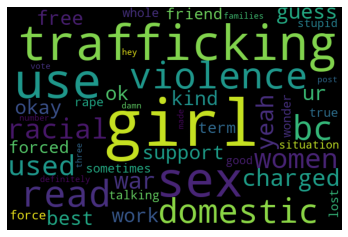

In [ ]:
# topic 0
draw_word_cloud(0)

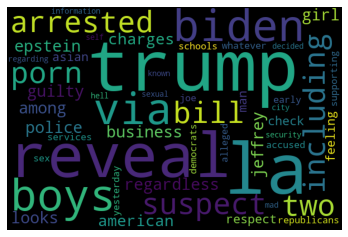

In [ ]:
# topic 1
draw_word_cloud(1)